In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
results = pd.read_csv('./../../../data_source/results/baseline_nofilter_dfs.csv', index_col=0)
results.head()

,exp_id,experiment_id,test_score,train_score,test_score_variance,train_score_variance,exp_duration
0,72,StudentTTestSelection_PLSREstimator,0.531766,0.531222,0.002733,0.000128,NaN
1,370,StudentTTestSelection_PLSREstimator,0.531553,0.521493,0.000599,0.000208,NaN
2,159,StudentTTestSelection_PLSREstimator,0.507550,0.515649,0.001067,0.000062,NaN
3,805,StudentTTestSelection_PLSREstimator,0.527244,0.511652,0.002007,0.000127,NaN
4,728,StudentTTestSelection_PLSREstimator,0.519231,0.509766,0.001025,0.000038,NaN


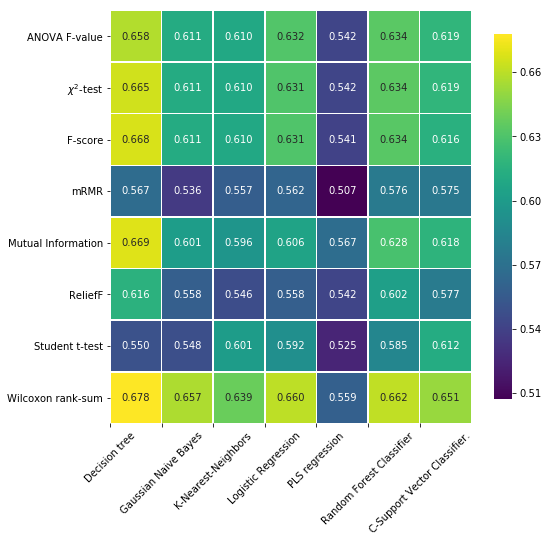

In [12]:
# NIR = 0.677

model_grps = results.groupby('experiment_id')
_avg_scores = model_grps['test_score'].mean()

_rows, _cols = zip(*list(map(lambda label: label.split('_'), _avg_scores.index)))
rows = np.unique(_rows)
cols = np.unique(_cols)

avg_scores = model_grps['test_score'].mean().values.reshape(np.size(rows), np.size(cols))

model_names = [
    'Decision tree', 'Gaussian Naive Bayes',
    'K-Nearest-Neighbors', 'Logistic Regression',
    'PLS regression', 'Random Forest Classifier',
    'C-Support Vector Classifier.'
]
selector_names = [
    'ANOVA F-value', r'$\chi^2$-test', 'F-score',
    'mRMR', 'Mutual Information', 'ReliefF', 
    'Student t-test',
    'Wilcoxon rank-sum'
]

plt.figure(figsize=(8, 8))
sns.heatmap(
    avg_scores,
    yticklabels=selector_names,  
    xticklabels=model_names,
    vmin=np.nanmin(avg_scores) - 1e-4, 
    vmax=np.nanmax(avg_scores) + 1e-4,
    cmap=plt.cm.viridis, 
    robust=True,
    annot=True, 
    fmt='.3f', 
    square=1, 
    linewidth=.5, 
    cbar=True,
    cbar_kws={'shrink': 0.8},  
)
# Layout:
# Include var/std/CI in tuple
plt.xticks(np.arange(7), rotation=45)
plt.tight_layout()
plt.savefig('./../../../../prelim_univariate_dfs.png')